## TPOT Demonstration
Example of tpot for a classification dataset
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

From TPOT's paper:<br>auto-sklearn uses Bayesian optimization to discover the ideal combination of feature preprocessors, models, and model hyperparameters to maximize classification accuracy.<br>However, auto-sklearn explores a fixed set of pipelines that only include one data preprocessor, one feature preprocessor, and one model. Thus, auto-sklearn
is incapable of producing arbitrarily large pipelines, which may be important for autoML.

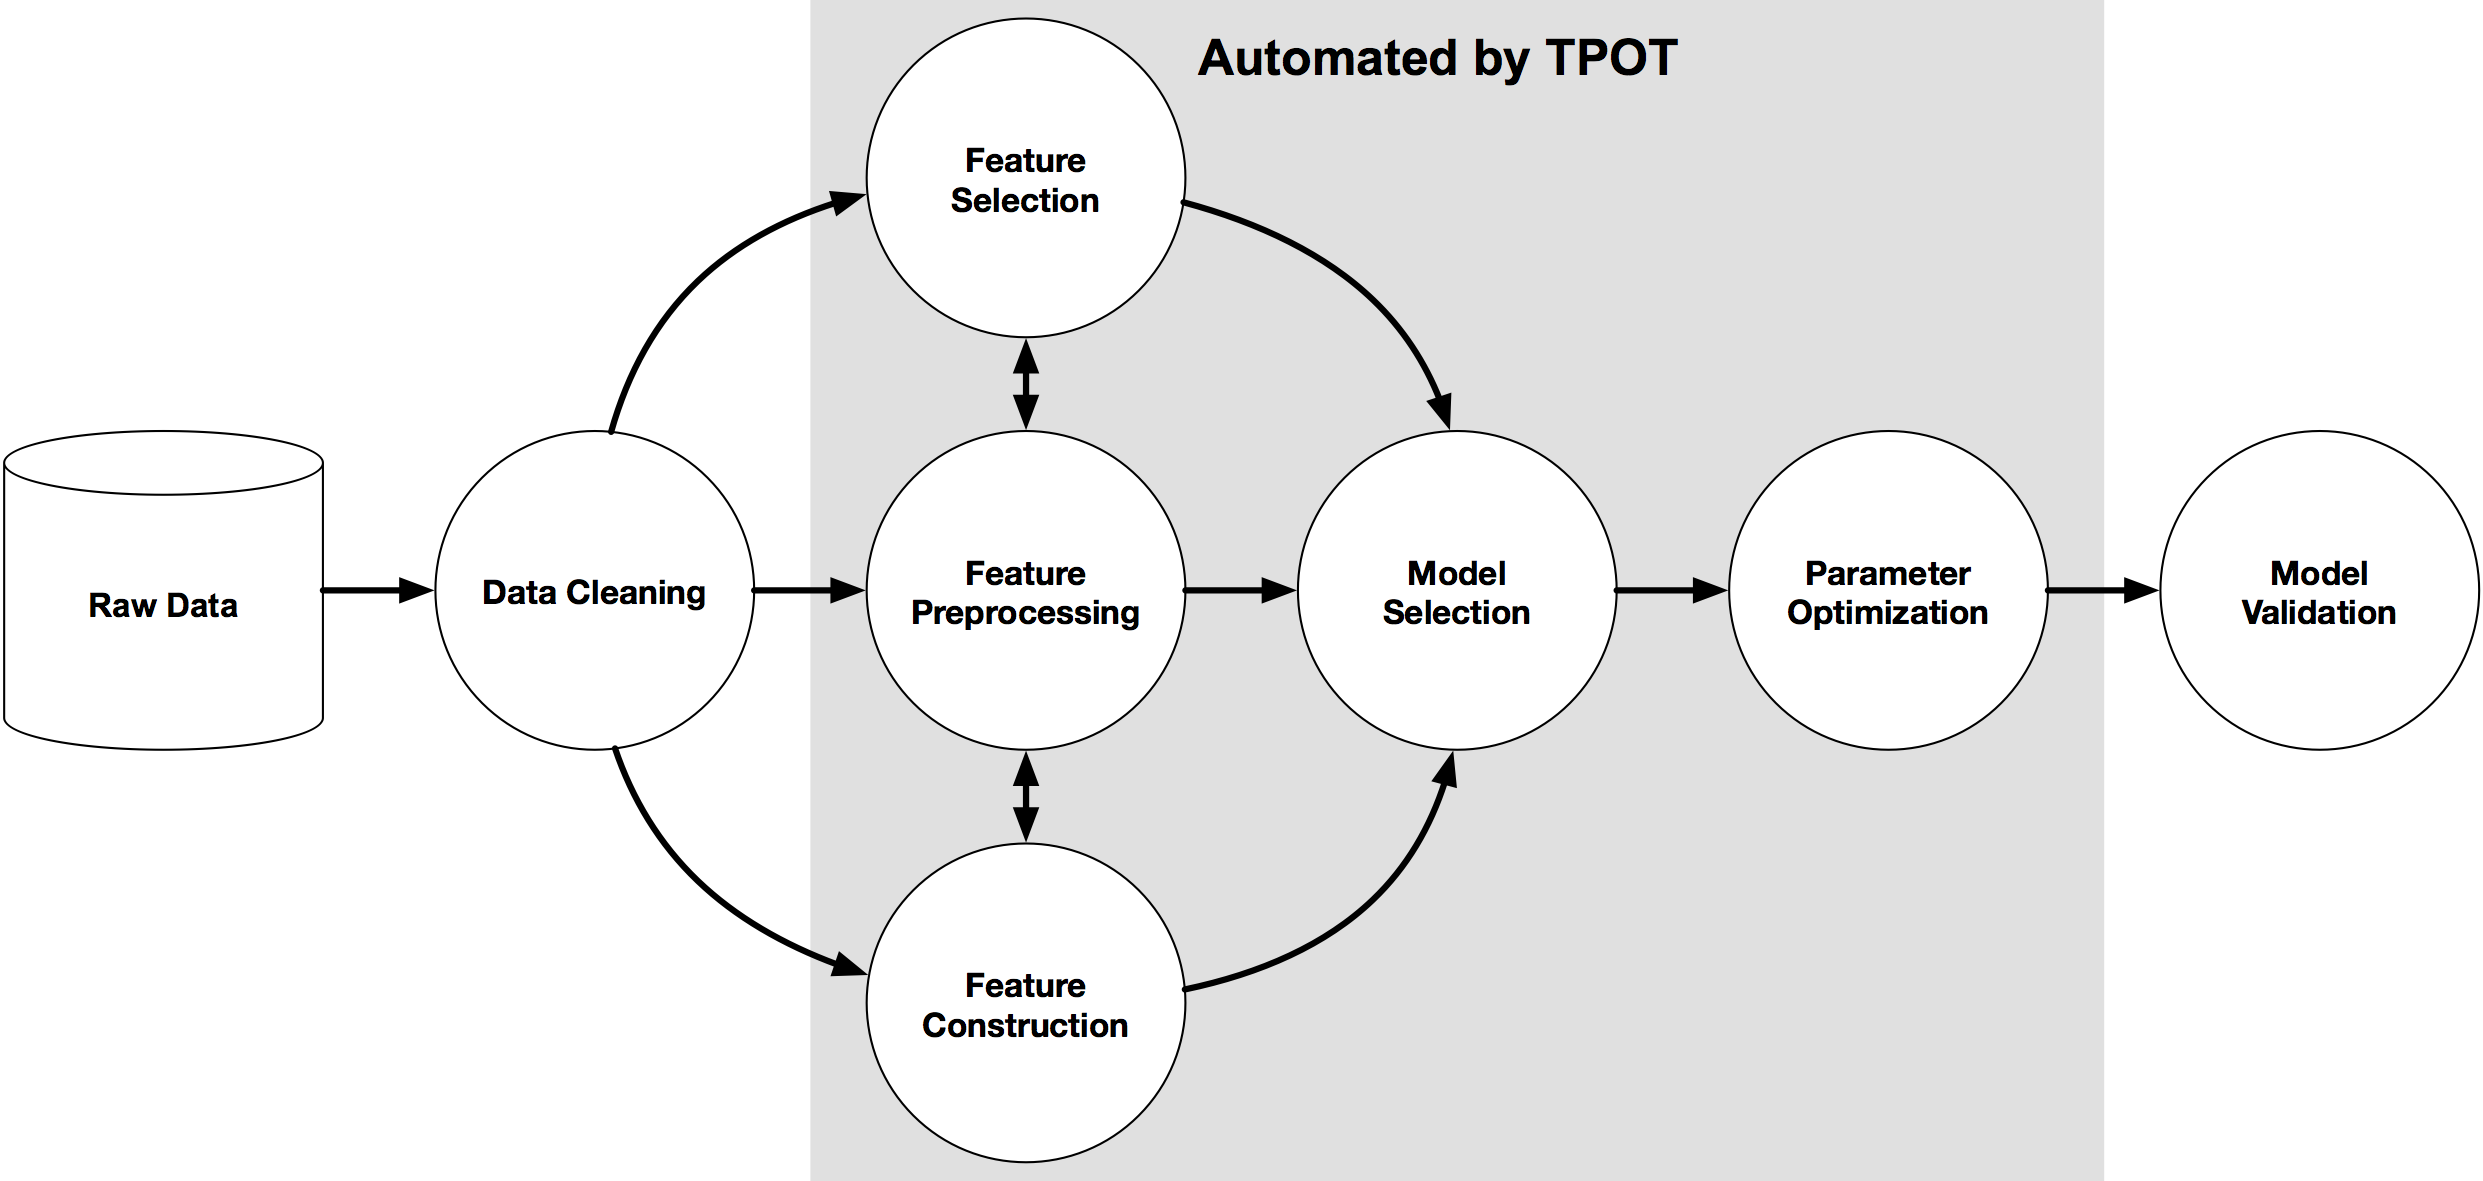

Sources:
* https://dl.acm.org/doi/pdf/10.1145/2908812.2908918
* https://github.com/EpistasisLab/tpot
* https://machinelearningmastery.com/automl-libraries-for-python/

In [2]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# from tpot import TPOTClassifier
from multi_train_TPOT import MultiTrain
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


### Initialize MultiTrain

In [9]:
######## CREATE TRAIN AND TEST #########

# from sklearn.model_selection import train_test_split
# data = pd.read_csv('./data/BreastCancer/data.csv', index_col='id')
# data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# y = data['diagnosis']
# X = data.drop(['diagnosis', 'Unnamed: 32'], axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train.to_csv('./data/BreastCancer/X_train.csv')
# y_train.to_csv('./data/BreastCancer/y_train.csv')
# y_test.to_csv('./data/BreastCancer/y_test.csv')
# X_test.to_csv('./data/BreastCancer/X_test.csv')


In [10]:
multi = MultiTrain()
multi.X_train = pd.read_csv('./data/BreastCancer/X_train.csv', index_col=[0])
multi.y_train = pd.read_csv('./data/BreastCancer/y_train.csv', index_col=[0])
multi.X_test = pd.read_csv('./data/BreastCancer/X_test.csv', index_col=[0])
multi.y_test = pd.read_csv('./data/BreastCancer/y_test.csv', index_col=[0])

In [13]:
multi.X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
87164,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,...,18.79,17.04,125.00,1102.0,0.15310,0.3583,0.5830,0.18270,0.3216,0.10100
905190,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151
857637,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,...,26.14,28.14,170.10,2145.0,0.16240,0.3511,0.3879,0.20910,0.3537,0.08294
914580,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,14.06,24.34,92.82,607.3,0.12760,0.2506,0.2028,0.10530,0.3035,0.07661
892604,12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,...,13.46,23.07,88.13,551.3,0.10500,0.2158,0.1904,0.07625,0.2685,0.07764


### define search

In [15]:
# generations = [4, 16, 32, 64, 128]
population_sizes = [1, 2, 4, 8, 16, 32, 64, 128]
offspring_sizes =  [1, 2, 4, 8, 16, 32, 64, 128]
mutation_rates =   [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
crossover_rates =  [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# # One run:
generations = []
# population_sizes = []
# offspring_sizes = []
# mutation_rates = []
# crossover_rates = []


In [16]:
%%time
multi.build_and_fit_classifier(dataset_name='BreastCancer', generations=generations,
                              population_sizes=population_sizes,
                              offspring_sizes=offspring_sizes,
                              mutation_rates=mutation_rates,
                              crossover_rates=crossover_rates)

-> Fitting - Population Size: 1


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/1 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9003417634996582

Best pipeline: SGDClassifier(input_matrix, alpha=0.01, eta0=0.01, fit_intercept=True, l1_ratio=0.5, learning_rate=invscaling, loss=modified_huber, penalty=elasticnet, power_t=0.5)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_population-size_1.py'
-> Fitting - Population Size: 2


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/2 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.934313055365687

Best pipeline: GaussianNB(input_matrix)
Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_population-size_2.py'
-> Fitting - Population Size: 4


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/4 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9763841421736158

Best pipeline: BernoulliNB(GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=10, max_features=0.15000000000000002, min_samples_leaf=19, min_samples_split=19, n_estimators=100, subsample=0.3), alpha=0.1, fit_prior=True)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_population-size_4.py'
-> Fitting - Population Size: 8


Optimization Progress:   0%|          | 0/8 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.952734107997266

Best pipeline: KNeighborsClassifier(RobustScaler(RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=16, min_samples_split=7, n_estimators=100)), n_neighbors=19, p=2, weights=uniform)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_population-size_8.py'
-> Fitting - Population Size: 16


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/16 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9579972658920027

Best pipeline: MLPClassifier(StandardScaler(input_matrix), alpha=0.001, learning_rate_init=1.0)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_population-size_16.py'
-> Fitting - Population Size: 32


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/32 [00:00<?, ?pipeline/s]


10.55 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=8, max_features=0.45, min_samples_leaf=6, min_samples_split=10, n_estimators=100, subsample=0.6500000000000001)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_population-size_32.py'
-> Fitting - Population Size: 64


Optimization Progress:   0%|          | 0/64 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9736842105263157

Best pipeline: MLPClassifier(StandardScaler(input_matrix), alpha=0.1, learning_rate_init=0.001)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_population-size_64.py'
-> Fitting - Population Size: 128


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/128 [00:00<?, ?pipeline/s]


10.52 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: SGDClassifier(MinMaxScaler(input_matrix), alpha=0.0, eta0=0.01, fit_intercept=True, l1_ratio=1.0, learning_rate=constant, loss=squared_hinge, penalty=elasticnet, power_t=100.0)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_population-size_128.py'
-> Fitting - Offspring Size: 1


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9632604237867396

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=5, min_child_weight=4, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_offspring-size_1.py'
-> Fitting - Offspring Size: 2


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9737525632262474

Best pipeline: LinearSVC(ZeroCount(input_matrix), C=15.0, dual=False, loss=squared_hinge, penalty=l1, tol=0.01)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_offspring-size_2.py'
-> Fitting - Offspring Size: 4


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.97634996582365

Best pipeline: MLPClassifier(RobustScaler(input_matrix), alpha=0.001, learning_rate_init=0.001)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_offspring-size_4.py'
-> Fitting - Offspring Size: 8


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.10 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LinearSVC(RFE(input_matrix, criterion=entropy, max_features=0.25, n_estimators=100, step=0.8), C=5.0, dual=False, loss=squared_hinge, penalty=l1, tol=0.01)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_offspring-size_8.py'
-> Fitting - Offspring Size: 16


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.56 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=1.0, max_depth=9, max_features=0.5, min_samples_leaf=18, min_samples_split=5, n_estimators=100, subsample=1.0)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_offspring-size_16.py'
-> Fitting - Offspring Size: 32


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


12.20 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=1, max_features=0.8500000000000001, min_samples_leaf=8, min_samples_split=12, n_estimators=100, subsample=0.9500000000000001)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_offspring-size_32.py'
-> Fitting - Offspring Size: 64


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


11.32 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: MLPClassifier(MinMaxScaler(input_matrix), alpha=0.1, learning_rate_init=0.1)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_offspring-size_64.py'
-> Fitting - Offspring Size: 128


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


14.18 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LinearSVC(input_matrix, C=5.0, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_offspring-size_128.py'
-> Fitting - Mutation Rate: 0.1, Crossover Rate: 0.9


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: 

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]

/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")



11.88 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GaussianNB(GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=1, max_features=0.9500000000000001, min_samples_leaf=10, min_samples_split=5, n_estimators=100, subsample=0.5))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_mut-cross-rate_0.1,0.9.py'
-> Fitting - Mutation Rate: 0.2, Crossover Rate: 0.8


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: 

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.34 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: BernoulliNB(LinearSVC(input_matrix, C=25.0, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05), alpha=10.0, fit_prior=False)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_mut-cross-rate_0.2,0.8.py'
-> Fitting - Mutation Rate: 0.3, Crossover Rate: 0.7


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.06 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=6, max_features=0.4, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.7000000000000001)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_mut-cross-rate_0.3,0.7.py'
-> Fitting - Mutation Rate: 0.4, Crossover Rate: 0.6


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.27 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=4, max_features=1.0, min_samples_leaf=19, min_samples_split=6, n_estimators=100, subsample=0.45)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_mut-cross-rate_0.4,0.6.py'
-> Fitting - Mutation Rate: 0.5, Crossover Rate: 0.5


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.04 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LinearSVC(input_matrix, C=20.0, dual=False, loss=squared_hinge, penalty=l1, tol=0.001)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_mut-cross-rate_0.5,0.5.py'
-> Fitting - Mutation Rate: 0.6, Crossover Rate: 0.4


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


11.80 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(MaxAbsScaler(input_matrix), learning_rate=0.1, max_depth=2, max_features=0.7000000000000001, min_samples_leaf=11, min_samples_split=17, n_estimators=100, subsample=0.2)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_mut-cross-rate_0.6,0.4.py'
-> Fitting - Mutation Rate: 0.7, Crossover Rate: 0.3


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: 

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.42 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=1.0, max_depth=4, max_features=0.9500000000000001, min_samples_leaf=18, min_samples_split=15, n_estimators=100, subsample=0.8500000000000001)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_mut-cross-rate_0.7,0.3.py'
-> Fitting - Mutation Rate: 0.8, Crossover Rate: 0.2


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.72 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=1, max_features=0.4, min_samples_leaf=11, min_samples_split=13, n_estimators=100, subsample=0.45)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_mut-cross-rate_0.8,0.2.py'
-> Fitting - Mutation Rate: 0.9, Crossover Rate: 0.1


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.86 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: MLPClassifier(StandardScaler(input_matrix), alpha=0.01, learning_rate_init=0.5)
Finished - saved to './models/BreastCancer/tpot/tpot_BreastCancer_mut-cross-rate_0.9,0.1.py'
End
CPU times: user 25min 22s, sys: 2min 16s, total: 27min 38s
Wall time: 3h 32min 34s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency 

## Visualize 

In [17]:
collected_data = pd.read_csv('./models/BreastCancer/tpot/logs/log.csv', index_col=[0])
collected_data

,Feature,Value,Elapsed_Time,Train_Score,Test_Score
0,Population_Size,1,41.878550,0.881890,0.930851
1,Population_Size,2,35.739748,0.939633,0.941489
2,Population_Size,4,50.587104,1.000000,0.973404
3,Population_Size,8,78.668071,0.963255,0.957447
4,Population_Size,16,89.860565,0.997375,0.978723
5,Population_Size,32,636.382327,1.000000,0.962766
6,Population_Size,64,633.792499,0.992126,0.978723
7,Population_Size,128,632.786080,0.979003,0.978723
8,Offspring_Size,1,531.064659,0.997375,0.968085
9,Offspring_Size,2,338.673343,0.986877,0.978723


In [18]:
population_size_df = collected_data[collected_data['Feature'] == 'Population_Size']
offspring_size_df = collected_data[collected_data['Feature'] == 'Offspring_Size']
mutcross_rates_df = collected_data[collected_data['Feature'] == 'Mutation_Crossover_Rates']

### Population Size Effects

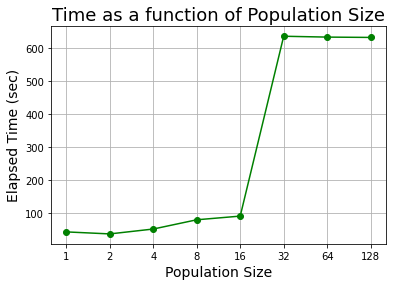

In [19]:
plt.plot(population_size_df['Value'], population_size_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Population Size', fontsize=18)
plt.xlabel('Population Size', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)
plt.show()

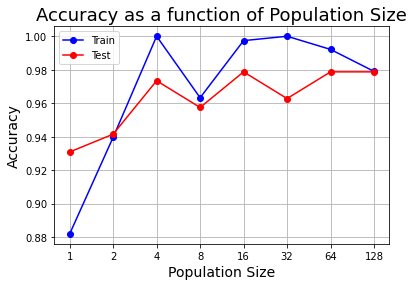

In [20]:
plt.plot(population_size_df['Value'], population_size_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(population_size_df['Value'], population_size_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Population Size', fontsize=18)
plt.xlabel('Population Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Offspring Size Effects

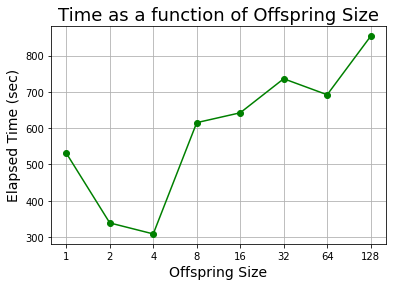

In [21]:
plt.plot(offspring_size_df['Value'], offspring_size_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Offspring Size', fontsize=18)
plt.xlabel('Offspring Size', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)
plt.show()

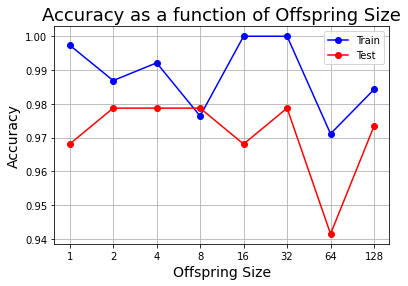

In [22]:
plt.plot(offspring_size_df['Value'], offspring_size_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(offspring_size_df['Value'], offspring_size_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Offspring Size', fontsize=18)
plt.xlabel('Offspring Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Mutation - Crossover Rates Effects

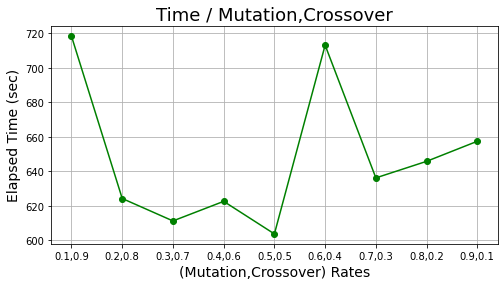

In [23]:
plt.figure(figsize=(8,4))

plt.plot(mutcross_rates_df['Value'], mutcross_rates_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time / Mutation,Crossover', fontsize=18)
plt.xlabel('(Mutation,Crossover) Rates', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)

plt.show()

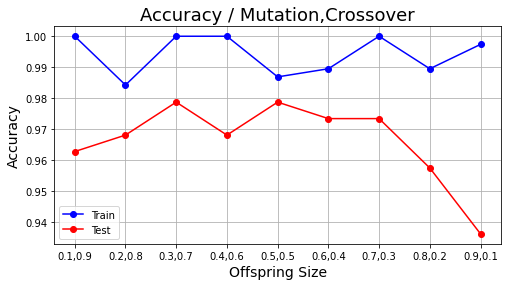

In [24]:
plt.figure(figsize=(8,4))
plt.plot(mutcross_rates_df['Value'], mutcross_rates_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(mutcross_rates_df['Value'], mutcross_rates_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy / Mutation,Crossover', fontsize=18)
plt.xlabel('Offspring Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()